<h1 align="center" style="color:#00529b;">Estimation du salaire - Analyse de Données &  Prédiction </h1>
<h2 align="center" style="color:#00529b;">ECE - École d'Ingénieurs Campus Lyon</h2>
<h3 align="center" style="color:#007acc;">Projet Machine Learning & Deep Learning, A.A. 2023/2024</h3>

---

<div style="display:flex; justify-content: space-around;">
    <img src="/Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/image/1686844536561.png" alt="Data Science Salaries 2024" width="800" style="float:left; margin-right: 20px;"/>
    <div>
       <h3><u>Salaire en Science des Données 2024</u> (<a href="https://www.kaggle.com/datasets/sazidthe1/data-science-salaries" target="_blank">Cliquez ici pour obtenir le dataset</a>)</h3>
        <p><strong>Objectif :</strong> Je vise à développer un modèle de régression pour prédire en temps réel le salaire dans le domaine de la Science des Données. De plus, je souhaite identifier les caractéristiques les plus corrélées avec les salaires des Data Scientists.</p>
        <h3>Description des Colonnes du Dataset :</h3>
        <p>Dans le domaine de la Science des Données, comprendre les tendances et les modèles de salaires est crucial pour les professionnels et les organisations. Ce dataset vise à éclairer le paysage des Salaires en Science des Données de 2020 à 2024. En analysant les données salariales sur cette période, les passionnés de données, les chercheurs et les professionnels de l'industrie peuvent obtenir des informations précieuses sur les tendances salariales, les variations régionales et les facteurs potentiels influençant la rémunération au sein de la communauté des Data Scientists.</p>
        <table>
            <thead>
                <tr>
                    <th>Nom de la Colonnes</th>
                    <th>Description</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>job_title</td>
                    <td>Le titre du poste ou le rôle associé au salaire rapporté.</td>
                </tr>
                <tr>
                    <td>experience_level</td>
                    <td>Le niveau d'expérience de l'individu.</td>
                </tr>
                <tr>
                    <td>employment_type</td>
                    <td>Indique si l'emploi est à temps plein, à temps partiel, etc.</td>
                </tr>
                <tr>
                    <td>work_models</td>
                    <td>Describtion des différents modèles de travail (à distance, sur place, hybride).</td>
                </tr>
                <tr>
                    <td>work_year</td>
                    <td>L'année spécifique à laquelle les informations sur le salaire ont été enregistrées.</td>
                </tr>
                <tr>
                    <td>employee_residence</td>
                    <td>Lieu de résidence de l'employé.</td>
                </tr>
                <tr>
                    <td>salary</td>
                    <td>Le salaire rapporté dans la devise d'origine.</td>
                </tr>
                <tr>
                    <td>salary_currency</td>
                    <td>La devise dans laquelle le salaire est libellé.</td>
                </tr>
                <tr>
                    <td>salary_in_usd</td>
                    <td>Le salaire converti en dollars américains (USD).</td>
                </tr>
                <tr>
                    <td>company_location</td>
                    <td>L'emplacement géographique de l'organisation employeuse.</td>
                </tr>
                <tr>
                    <td>company_size</td>
                    <td>La taille de l'entreprise, catégorisée par le nombre d'employés.</td>
                </tr>
            </tbody>
        </table>
    </div>
</div>



In [11]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from pathlib import Path
from pprint import pprint
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# visulisation des données
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

# File system manangement
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Sklearn processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  StratifiedShuffleSplit,ShuffleSplit,RepeatedStratifiedKFold,StratifiedKFold

# Sklearn regression algorithms regression models.
from time import time
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor

# Sklearn regression model evaluation functions
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Chargement du jeu de données </div> 

In [17]:
def load_data(file_path):
    """
    Charge les données à partir du fichier CSV spécifié.
    
    Args:
    file_path (str): Chemin du fichier CSV.
    
    Returns:
    pandas.DataFrame: Les données chargées à partir du fichier CSV.
    """
    data = pd.read_csv(file_path, sep=',')
    # Renommer la première colonne en "ID"
    data = data.rename(columns={"Unnamed: 0": "ID"})
    data.reset_index(drop=True, inplace=True)
    data.sort_index(axis=0, inplace=True)
    return data

# Chemin vers le fichier CSV
path = "/Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/data_science_salaries.csv"

# Charger les données à partir du fichier spécifié
data = load_data(path)

# Afficher la forme de l'ensemble de données
print("Les données en entrée ont {} lignes et {} colonnes".format(data.shape[0], data.shape[1]))

# Afficher quelque lignes de l'ensemble de données:
display(data.head())

Les données en entrée ont 6599 lignes et 11 colonnes


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Analyse du dataset </div> 

In [19]:
def resume_inspection_colonnes(data_frame):
    """
    Une fonction utilitaire qui fournit un résumé plus complet des colonnes du dataframe
    que les méthodes intégrées df.info() et df.describe().
    """
    
    total_lignes = len(data_frame)
    resume = pd.DataFrame({
        'Total Lignes': [total_lignes] * data_frame.shape[1],  # Nombre total de lignes dans le dataframe
        'Lignes avec Valeurs Manquantes': data_frame.isnull().sum(),  # Nombre de lignes avec des valeurs manquantes
        'Toutes les Valeurs Uniques': data_frame.nunique() == total_lignes,  # Vérifie si toutes les valeurs sont uniques dans chaque colonne
        'Cardinalité': data_frame.nunique(),  # Nombre de valeurs uniques dans chaque colonne
        'Contient des Valeurs Null': data_frame.isna().any(),  # Indique si la colonne contient des valeurs nulles
        'Pourcentage de Null': round((data_frame.isnull().sum() / total_lignes) * 100, 2),  # Pourcentage de valeurs nulles par rapport au total des lignes
        'Types de Données': data_frame.dtypes,  # Types de données de chaque colonne
        'Spécimens': data_frame.sample(2).T.values.tolist()  # Échantillons aléatoires de 5 lignes pour donner un aperçu des données
    })

    return resume


In [20]:
resultat_summary = resume_inspection_colonnes(data)
display(resultat_summary)

,Total Lignes,Lignes avec Valeurs Manquantes,Toutes les Valeurs Uniques,Cardinalité,Contient des Valeurs Null,Pourcentage de Null,Types de Données,Spécimens
job_title,6599,0,False,132,False,0.0,object,"[Data Analyst, Data Analyst]"
experience_level,6599,0,False,4,False,0.0,object,"[Senior-level, Senior-level]"
employment_type,6599,0,False,4,False,0.0,object,"[Full-time, Full-time]"
work_models,6599,0,False,3,False,0.0,object,"[On-site, Remote]"
work_year,6599,0,False,5,False,0.0,int64,"[2023, 2024]"
employee_residence,6599,0,False,87,False,0.0,object,"[United States, United States]"
salary,6599,0,False,1833,False,0.0,int64,"[145500, 192500]"
salary_currency,6599,0,False,22,False,0.0,object,"[USD, USD]"
salary_in_usd,6599,0,False,2147,False,0.0,int64,"[145500, 192500]"
company_location,6599,0,False,75,False,0.0,object,"[United States, United States]"


# Analyse du Dataset

Après avoir étudié en détail notre jeu de données, voici nos conclusions :

- **Absence de valeurs manquantes :** Nous avons constaté qu'aucune valeur NaN n'est présente dans notre dataset, ce qui garantit la complétude des données.

- **Conformité des types de données :** Chaque colonne présente le type de données qui lui est approprié, ce qui assure la cohérence et la qualité de notre jeu de données.

- **Classification des types de colonnes :** Les colonnes de notre dataset peuvent être classées en deux groupes : les colonnes de type numérique et les colonnes de type catégorique.

- **Cardinalité des colonnes catégoriques :** Certaines colonnes de notre dataset présentent une cardinalité assez faible, variant entre 3 et 5.

En résumé, notre jeu de données est complet, bien structuré et conforme aux exigences pour des analyses approfondies.


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Analyse exploratoire des colonnes numériques </div> 

### Séparons les variables numériques et catégorielles

In [29]:
def separer_variables_numeriques_et_categorielles(data):
    # Partie 1 : Séparation des variables numériques
    donnees_numeriques = data.select_dtypes(include=[np.number]).copy()
    
    # Affichage de la partie numérique
    print("Partie 1. Numérique")
    
    # Affichage du nombre de colonnes numériques
    print('Nombre de colonnes numériques :', donnees_numeriques.shape[1])
    
    # Affichage des colonnes numériques 
    print("Colonnes numériques : ",donnees_numeriques.columns.tolist())

    # Saut de ligne pour la clarté
    print("")

    # Partie 2 : Séparation des variables catégorielles
    donnees_categorielles = data.select_dtypes(exclude=[np.number]).copy()
    
    # Affichage de la partie catégorique
    print("Partie 2. Catégorique")
    
    # Affichage du nombre de colonnes catégoriques
    print('Nombre de colonnes catégoriques :', donnees_categorielles.shape[1])
    
    # Affichage des colonnes catégoriques 
    print("Colonnes catégoriques : ",donnees_categorielles.columns.tolist())

    # Retourne les deux datasets séparés
    return donnees_numeriques, donnees_categorielles

df_numeriques, df_categoriques = separer_variables_numeriques_et_categorielles(data)

Partie 1. Numérique
Nombre de colonnes numériques : 3
Colonnes numériques :  ['work_year', 'salary', 'salary_in_usd']

Partie 2. Catégorique
Nombre de colonnes catégoriques : 8
Colonnes catégoriques :  ['job_title', 'experience_level', 'employment_type', 'work_models', 'employee_residence', 'salary_currency', 'company_location', 'company_size']


In [60]:
def get_iqr_values_Specifying_quartile(df_in, col_name, first_quartile, third_quartile):
    median = df_in[col_name].median()  # Calcul de la médiane
    mean = df_in[col_name].mean()  # Calcul de la moyenne
    q1 = df_in[col_name].quantile(first_quartile)  # xème percentile / 1er quartile
    q3 = df_in[col_name].quantile(third_quartile)  # yème percentile / 3e quartile
    iqr = q3 - q1  # Écart interquartile
    minimum = q1 - (1.5 * iqr)  # Valeur minimale ou le marqueur |- dans la boîte à moustaches
    maximum = q3 + (1.5 * iqr)  # Valeur maximale ou le marqueur -| dans la boîte à moustaches
    return mean, median, q1, q3, iqr, minimum, maximum

def box_and_whisker_Specifying_quartile(df, col_name, first_quartile, third_quartile):
    mean, median, q1, q3, iqr, minimum, maximum = get_iqr_values_Specifying_quartile(df, col_name, first_quartile, third_quartile)
    std_dev = df[col_name].std()  # Écart-type
    variance = df[col_name].var()  # Variance
    
    title = f"Moyenne: {mean:.2f}, Médiane: {median:.2f}, Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}, Min: {minimum:.2f}, Max: {maximum:.2f}"
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
    
    sns.distplot(df[col_name], ax=axes[0])
    axes[0].set_title(f'Distribution et Box plot de {col_name}')
    axes[0].axvline(mean, color='k', linestyle='--', label=f'Moyenne: {mean:.2f}')
    axes[0].axvline(median, color='y', linestyle='-', label=f'Médiane: {median:.2f}')
    axes[0].legend()  # Ajoute la légende au graphique de distribution

    sns.boxplot(x=df[col_name], ax=axes[1])
    axes[1].set_title(f'Informations : {title}')
    
    # Ajout de l'écart-type et de la variance dans la légende
    axes[0].legend(title=f"Écart-type: {std_dev:.2f}, Variance: {variance:.2f}")
    
    plt.tight_layout()
    plt.show()

### Salary Distribution

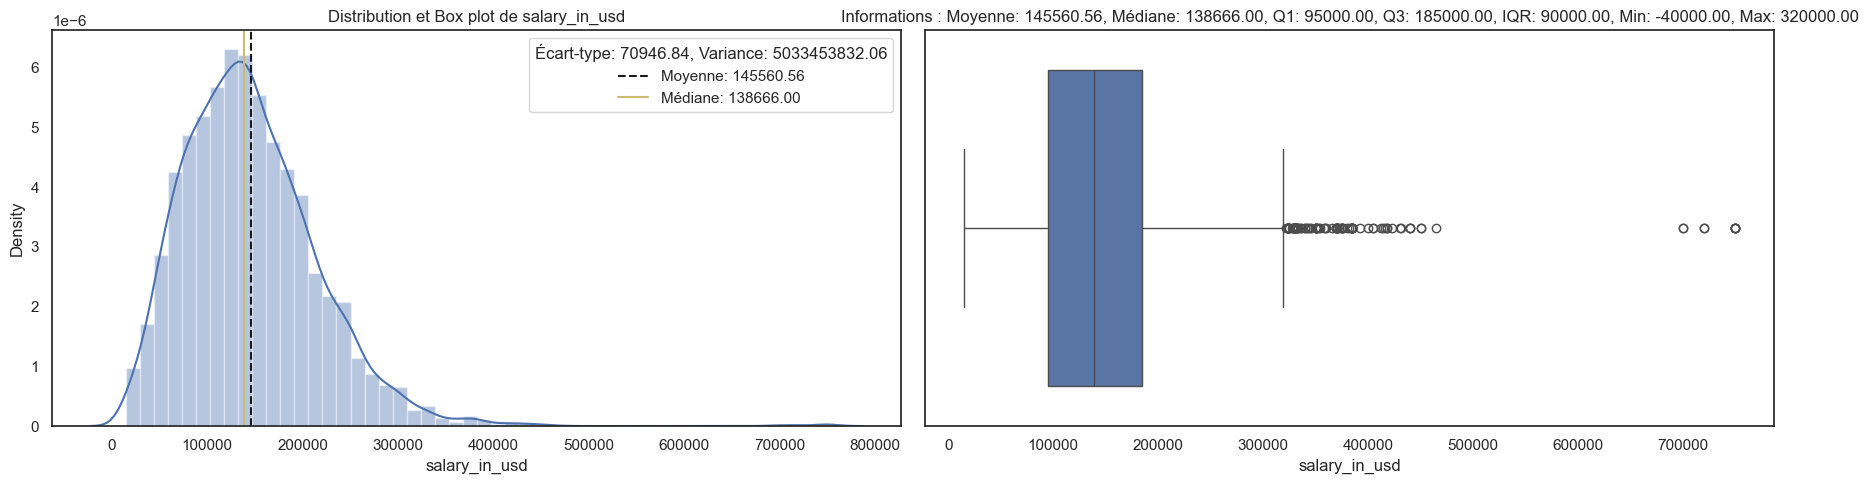

In [61]:
q1 ,q3 ,feature = 0.25, 0.75, 'salary_in_usd'
box_and_whisker_Specifying_quartile(data, feature,q1, q3)

**Le salaire moyen des data scientists dans le monde se situe à 145560.558569 USD**, formant le cœur de la distribution. Mais, **attendez**, l'intrigue s'épaissit ! 🤨 Le paysage salarial a ses **tournants et retournements**, comme le reflète l'écart type de  70946.838070 USD. Cette statistique épicée nous indique que la répartition des salaires n'est pas un **chemin droit et étroit** ; il y a des **pics et des vallées** qui rendent ce voyage à travers les gains en science des données d'autant plus intriguant ! 🏞️💸

Pour en savoir plus sur les notions de statistique, vous pouvez consulter ce [tutoriel sur la dispersion des paramètres](https://datatab.fr/tutorial/dispersion-parameter).


**Maintenant, enfilons nos bottes de randonnée statistiques et aventurons-nous plus profondément dans le terrain pour découvrir davantage d'insights ! 🥾🌐**

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Corrélations entre les différentes features et la target (salary_in_usd) </div> 

In [190]:
def visualiser_correlations(data):
    # Calculer la matrice de corrélation
    corr_matrix = data.corr()

    # Générer un heatmap avec seaborn
    plt.figure(figsize=(10, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.5) #cmap='RdYlGn'
    
    # Ajouter des étiquettes au graphique
    plt.title("Matrice de Corrélation entre les Features et la target salary_in_usd")
    
    # Afficher le graphique
    plt.show()

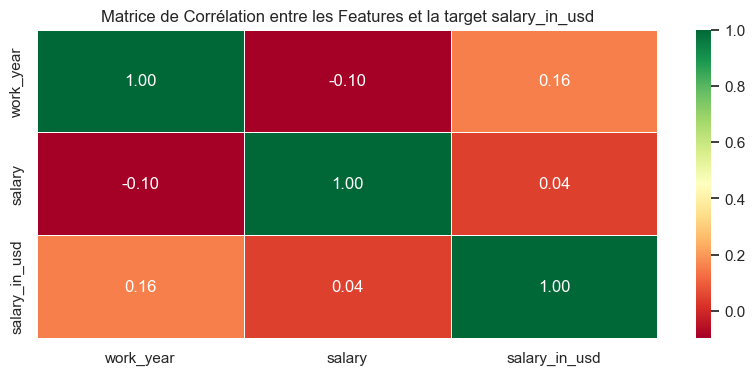

In [191]:
visualiser_correlations(df_numeriques)

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Analysis Relationship between Experience Level and Salary </div> 

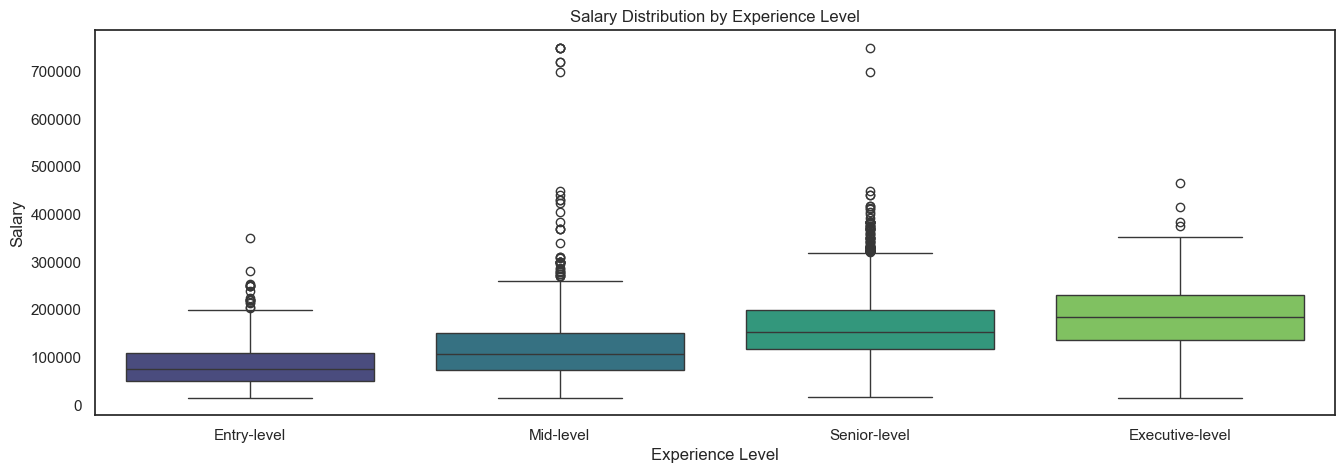

In [69]:
plt.figure(figsize=(16, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data, palette='viridis',order=['Entry-level','Mid-level','Senior-level','Executive-level'])
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.xticks(rotation=0)
plt.show()

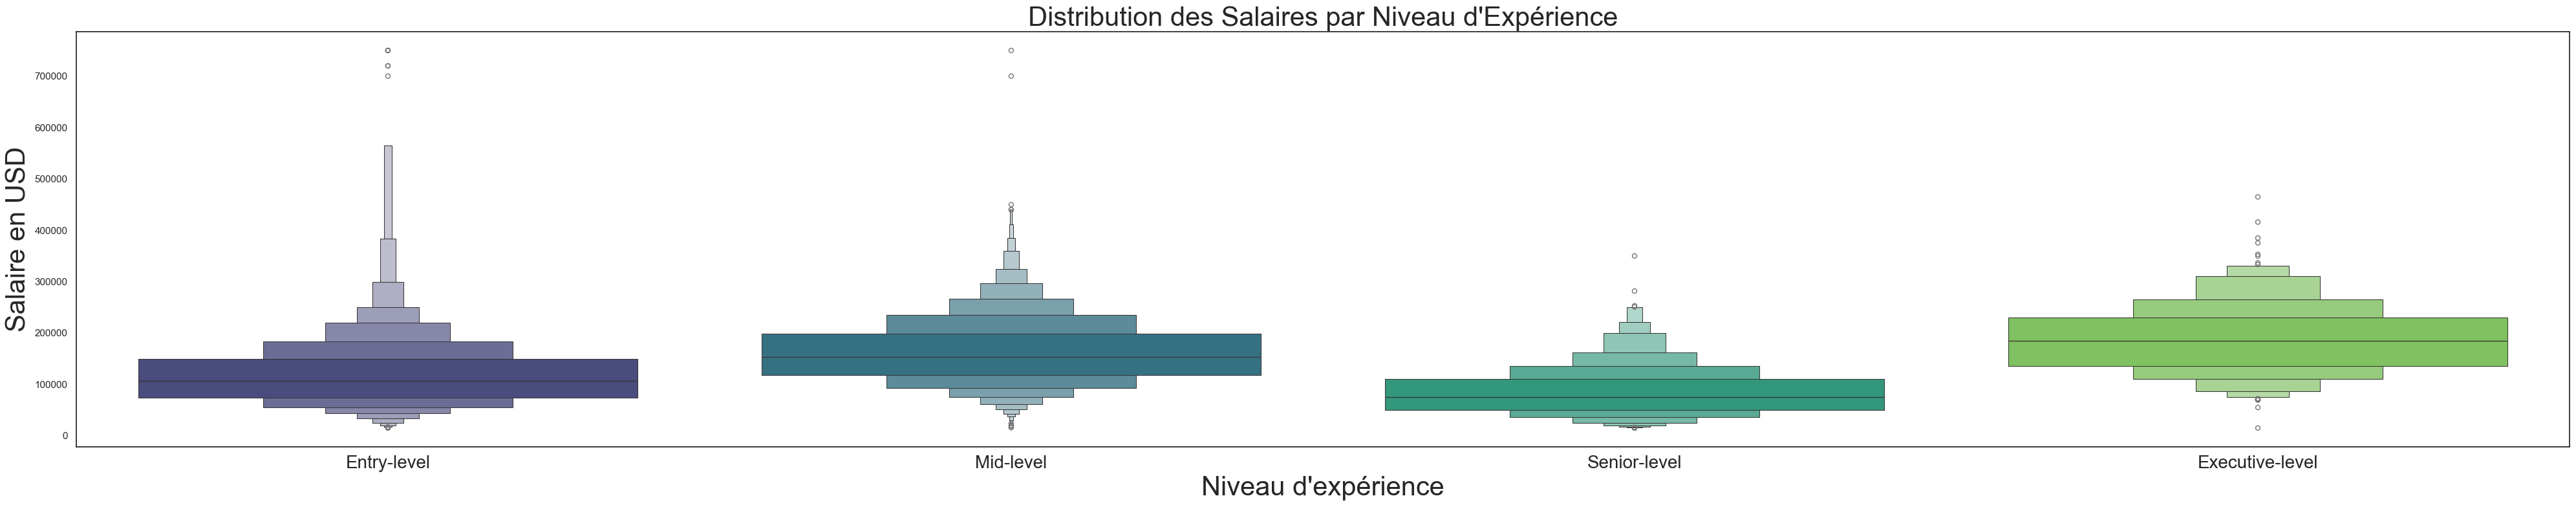

In [96]:
# Définition de la taille de la figure
plt.figure(figsize=(40, 8))

# Création du boxenplot avec personnalisation
sns.boxenplot(x='experience_level', y='salary_in_usd', data=data, palette="viridis")

# Ajout de labels et de titre
plt.xlabel('Niveau d\'expérience', fontsize=30)
plt.ylabel('Salaire en USD', fontsize=30)
plt.title('Distribution des Salaires par Niveau d\'Expérience', fontsize=30)

# Gestion de l'ordre des catégories sur l'axe x

# Gestion de l'ordre des catégories sur l'axe x
experience_order = ['Entry-level','Mid-level','Senior-level','Executive-level']
plt.xticks(ticks=range(len(experience_order)), labels=experience_order, fontsize=20, rotation=0)

# Affichage de la figure
plt.tight_layout()
plt.show()


---

En scrutant attentivement les données relatives aux niveaux d'expérience, une tendance se dessine nettement : les salaires évoluent de façon conséquente avec le temps passé dans le domaine, une progression parfaitement cohérente dans le panorama complexe de la science des données. Cette ascension salariale logique accompagne sans surprise l'acquisition croissante d'expérience et de compétences dans ce domaine en perpétuelle évolution. 📈💰

Cependant, il convient d'accorder une attention particulière à la strate des Experts en Science des Données. 🌟 En effet, quelques points de données se démarquent de manière significative, suggérant que certains Data Scientists de ce niveau émargent à des salaires véritablement substantiels. Ces vétérans de la discipline ne se contentent pas de gravir les échelons ; ils se distinguent avec éclat, arborant des rémunérations particulièrement confortables qui marquent de manière indéniable l'échiquier des salaires dans le domaine de la Science des Données. 🚀💡

En outre, il est notable de mentionner que les employés de niveau Exécutif bénéficient des rémunérations les plus élevées, symbolisant ainsi le sommet de la hiérarchie salariale dans cet univers professionnel. D'un autre côté, les employés de niveau Débutant sont associés aux salaires les plus modestes, reflétant ainsi le point d'entrée dans cette sphère lucrative mais exigeante. 📊🔍

---


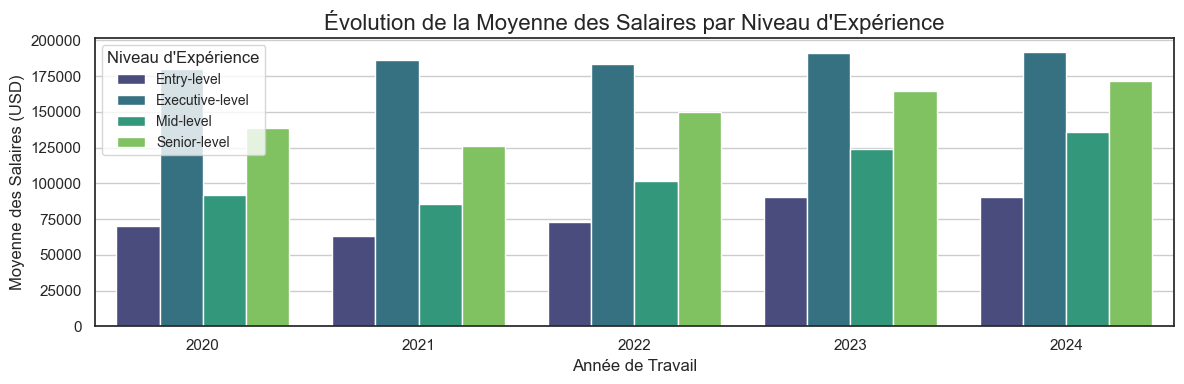

In [81]:
group_data = data.groupby(['experience_level', 'work_year'])['salary_in_usd'].mean().reset_index(name='mean by year')
# print(group_data)
# Création du DataFrame à partir des données
# Plot avec seaborn
plt.figure(figsize=(12, 4))
sns.barplot(data=group_data, x='work_year', y='mean by year', hue='experience_level', palette='viridis')

# Ajout de titres et labels
plt.title('Évolution de la Moyenne des Salaires par Niveau d\'Expérience', fontsize=16)
plt.xlabel('Année de Travail', fontsize=12)
plt.ylabel('Moyenne des Salaires (USD)', fontsize=12)
plt.legend(title='Niveau d\'Expérience', fontsize=10, title_fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Analyse de l'Évolution des Salaires par Niveau d'Expérience

Dans cette analyse, nous examinons **l'évolution des salaires moyens** pour chaque niveau d'expérience au fil des années.

#### Entry-level :
- Les salaires moyens pour les **débutants** (`Entry-level`) ont montré une tendance générale à la hausse au fil des années.
- En **2020**, le salaire moyen était d'environ **69 841,67 USD**, puis il a diminué légèrement en **2021** pour atteindre environ **63 463,07 USD**.
- À partir de **2022**, une forte augmentation est observée, atteignant environ **72 822,71 USD** en 2022, et une croissance significative en **2023** et **2024**, dépassant les **90 000 USD**.

#### Executive-level :
- Pour les **cadres supérieurs** (`Executive-level`), les salaires moyens étaient déjà significativement plus élevés en **2020**, autour de **179 958,25 USD**.
- Une légère augmentation est observée en **2021**, puis une tendance à la stabilité avec des fluctuations légères autour de **183 837,74 USD** en 2022 et **191 130,08 USD** en 2023.
- En **2024**, les salaires moyens pour les cadres supérieurs ont légèrement augmenté pour atteindre environ **191 874,47 USD**.

#### Mid-level :
- Les salaires moyens pour les professionnels de niveau intermédiaire (`Mid-level`) ont montré une tendance générale à la hausse au fil des années.
- En **2020**, le salaire moyen était d'environ **91 870,94 USD**, puis il a légèrement diminué en **2021** pour atteindre environ **85 440,78 USD**.
- À partir de **2022**, les salaires ont connu une croissance significative, atteignant environ **101 354,00 USD**, puis **124 171,64 USD** en 2023 et **135 577,73 USD** en 2024.

#### Senior-level :
- Les salaires moyens pour les professionnels seniors (`Senior-level`) ont également montré une tendance générale à la hausse au fil des années.
- En **2020**, le salaire moyen était d'environ **138 648,89 USD**, puis il a légèrement diminué en **2021** pour atteindre environ **125 989,75 USD**.
- À partir de **2022**, les salaires ont augmenté de manière significative, atteignant environ **150 241,08 USD** en 2022, puis **164 814,34 USD** en 2023 et **171 645,84 USD** en 2024.

### Interprétation Générale :
- Globalement, on observe une tendance à la hausse des salaires moyens pour tous les niveaux d'expérience au fil des années.
- Les **cadres supérieurs** ont généralement les salaires moyens les plus élevés, suivis des professionnels de niveau intermédiaire, des professionnels seniors, puis des débutants.
- Les années **2023** et **2024** ont généralement enregistré les plus fortes augmentations de salaires pour tous les niveaux d'expérience.

Cette analyse fournit un aperçu de l'évolution des salaires moyens dans les différents niveaux d'expérience au fil des années, ce qui peut être utile pour comprendre les tendances et les dynamiques salariales dans le domaine de la science des données.

In [85]:
print(f"Le salaire moyen pour les travailleurs à temps plein : {data[data['employment_type']=='Full-time']['salary_in_usd'].mean()}$")
print(f"Le salaire moyen pour les travailleurs à temps partiel : {data[data['employment_type']=='Part-time']['salary_in_usd'].mean()}$")

Le salaire moyen pour les travailleurs à temps plein : 146034.99893162394$
Le salaire moyen pour les travailleurs à temps partiel : 55291.0625$


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Feature Engineering </div> 

### Méthodes de Transformation des Caractéristiques Catégoriques en Caractéristiques Numériques :

1. **Label Encoder** :
   - Cette méthode encode les valeurs catégoriques en utilisant une approche d'encodage ordinal, où chaque catégorie se voit attribuer un entier unique.
   - Utile pour les caractéristiques ordinales où l'ordre a une signification.

2. **One-Hot Encoder** :
   - Convertit chaque catégorie en une colonne binaire, où chaque colonne représente une catégorie unique.
   - Utile pour les caractéristiques catégoriques sans ordre particulier, évitant ainsi d'attribuer un ordre arbitraire.

3. **Dummy Variables** :
   - Crée des colonnes binaires pour chaque catégorie unique, où 1 indique la présence de la catégorie et 0 son absence.
   - Similaire à One-Hot Encoding mais en laissant une colonne pour représenter la catégorie de base.

4. **Ordinal Encoder** :
   - Comme Label Encoder, mais il peut être plus utile pour les caractéristiques catégoriques ordinales où vous voulez préserver l'ordre.

5. **Frequency Encoder** :
   - Associe à chaque catégorie un nombre représentant sa fréquence dans la colonne.
   - Utile lorsque la fréquence d'apparition des catégories peut être une information importante.


In [163]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from category_encoders import OneHotEncoder as CatOneHotEncoder
from category_encoders import OrdinalEncoder as CatOrdinalEncoder

def encode_categorical_features(dataset):
    # Dictionnaire pour stocker les résultats
    encoded_results = {}

    # Méthode 1 : Label Encoder
    label_enc = LabelEncoder()
    label_encoded = dataset.apply(label_enc.fit_transform)
    encoded_results['LabelEncoder'] = label_encoded

    # Méthode 2 : One-Hot Encoder
    onehot_enc = OneHotEncoder(sparse=False, drop='first')
    onehot_encoded = onehot_enc.fit_transform(dataset)
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_enc.get_feature_names_out(dataset.columns))
    encoded_results['OneHotEncoder'] = onehot_encoded_df

    # Méthode 3 : Dummy Variables
    #dummy_encoded = pd.get_dummies(dataset, drop_first=True)
    #dummy_encoded = dummy_encoded.astype(int)  # Convertir les valeurs booléennes en entiers
    #encoded_results['DummyVariables'] = dummy_encoded

    # Méthode 4 : Ordinal Encoder
    ordinal_enc = OrdinalEncoder()
    ordinal_encoded = ordinal_enc.fit_transform(dataset)
    ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=dataset.columns)
    encoded_results['OrdinalEncoder'] = ordinal_encoded_df

    # Méthode 5 : Frequency Encoder (pour l'exemple)
    freq_encoded = dataset.copy() 
    # Implémentation du Frequency Encoder
    for col in dataset.columns.tolist():
            col_freq = dataset[col].value_counts(normalize=True)
            freq_encoded[col] = dataset[col].map(col_freq)

    encoded_results['FrequencyEncoder'] = freq_encoded

    return encoded_results


In [175]:
def visualize_column_counts(encoded_datasets):
    methods = list(encoded_datasets.keys())
    column_counts = [len(encoded_datasets[method].columns) for method in methods]

    plt.figure(figsize=(15, 4))
    bars = plt.bar(methods, column_counts, color='skyblue')
    plt.xlabel('Méthode de Transformation')
    plt.ylabel('Nombre de Colonnes')
    plt.title('Nombre de Colonnes pour Chaque Méthode de Transformation')
    plt.xticks(rotation=0)

    for bar, count in zip(bars, column_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.5, str(count), ha='center', va='bottom', fontsize=10)

    plt.show()

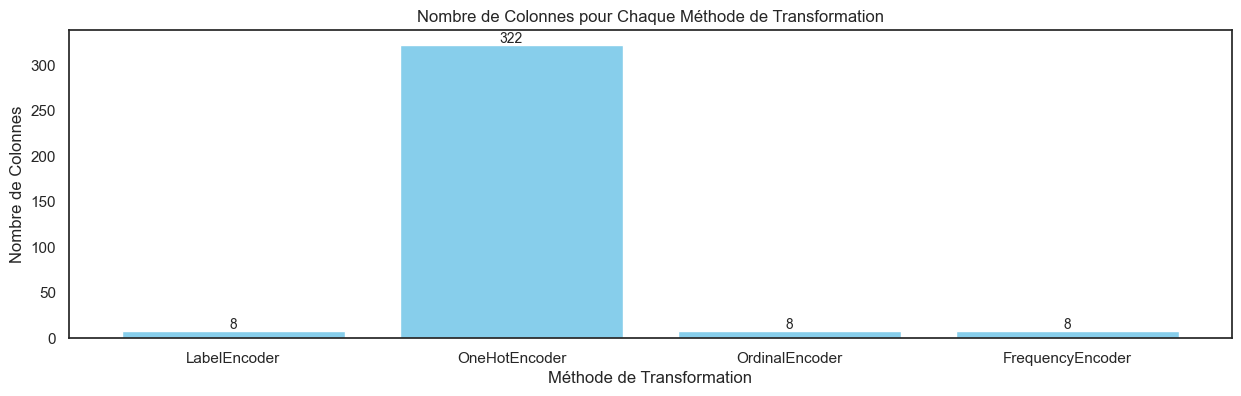

In [176]:
encoded_datasets = encode_categorical_features(df_categoriques.copy())
visualize_column_counts(encoded_datasets)

In [146]:
def concat_datasets(df_numeriques, encoded_datasets):

    # Concaténation des datasets le long de l'axe des colonnes (axis=1)
    concatenated_df = pd.concat([df_numeriques,encoded_datasets], axis=1)

    # Affichage de la forme du nouveau dataset
    print("Shape du nouveau dataset :", concatenated_df.shape)

    # Affichage des 5 premières lignes du nouveau dataset
    # print("\n5 premières lignes du nouveau dataset :\n", concatenated_df.head())

    return concatenated_df


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split dataset in train et test set </div> 

<div style="text-align:center">
  <div style="float:right; margin-left: 20px;">
    <img src="/Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/image/4_train-test-split.jpg" alt="Gas Turbine" width="800"/>
  </div>
</div>

In [125]:
def split_data(X, y, threshold_test=0.2, random_state=200):
    """
    Divise les données en ensembles d'entraînement et de test.

    Paramètres :
    - X : Features du jeu de données.
    - y : Valeurs cibles du jeu de données.
    - threshold_test : Taille du jeu de données de test (par défaut : 0.2).
    - random_state : Seed pour la reproductibilité (par défaut : 200).

    Retourne :
    - X_train : Features du jeu de données d'entraînement.
    - X_test : Features du jeu de données de test.
    - y_train : Valeurs cibles du jeu de données d'entraînement.
    - y_test : Valeurs cibles du jeu de données de test.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=threshold_test, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [123]:
def print_dataset_info(X_train, X_test, y_train, y_test):
    """
    Imprime des informations sur les dimensions et les classes des ensembles de données d'entrée.

    Paramètres :
    - X_train, X_test : Matrices de caractéristiques pour l'entraînement et le test.
    - y_train, y_test : Vecteurs cibles pour l'entraînement et le test.
    """
    # Imprime les dimensions de X_train, X_test, y_train et y_test
    print("")
    print(f"Dimensions de X_train : {X_train.shape}")
    print(f"Dimensions de X_test  : {X_test.shape}")
    print(f"Dimensions de y_train : {y_train.shape}")
    print(f"Dimensions de y_test  : {y_test.shape}")
    print("")

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Construire un modèle de Machine Learning pour notre problème de Regression. </div>

In [129]:
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ShuffleSplit,cross_val_score,train_test_split,cross_val_predict
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit, KFold ,RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# sklearn Algoritm of Machine Learning algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [131]:
def initialize_regression_models():
    """
    Initializes a dictionary of regression models.

    Returns:
    Dictionary of initialized regression models with model names as keys, sorted alphabetically.
    """
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "Decision Tree Regressor": DecisionTreeRegressor(),
        "Random Forest Regressor": RandomForestRegressor(),
        "Extra Trees Regressor": ExtraTreesRegressor(),
        "Gradient Boosting Regressor": GradientBoostingRegressor(),
        "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
        "Support Vector Regressor": SVR(),
        "XGBoost Regressor": XGBRegressor(),
        #"LightGBM Regressor": LGBMRegressor()
    }

    # Ordonner les modèles par clé (nom du modèle)
    sorted_models = dict(sorted(models.items()))

    return sorted_models


def Train_and_Evaluate_preformence_models(model, X_train, y_train, X_test, y_test):
    print(f"Entraînement du modèle avec {type(model).__name__}")

    start_time = time.time()  # Temps de début de l'entraînement

    # Entraînement du modèle
    model.fit(X_train, y_train)

    end_time = time.time()  # Temps de fin de l'entraînement
    training_time = end_time - start_time  # Temps écoulé pour l'entraînement

    print(f"Temps d'entraînement : {training_time:.2f} secondes")

    # Prédiction des valeurs pour le jeu de données de test
    y_pred = model.predict(X_test)

    # Calcul des différentes métriques
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    
    # Création du dictionnaire contenant les différentes métriques
    metrics_dict = {
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2,
        'Explained Variance': explained_variance,
        'Training Time': training_time
    }

    return metrics_dict

In [178]:
# Liste des méthodes de transformation à utiliser
methods = ['LabelEncoder', 'OneHotEncoder', 'OrdinalEncoder', 'FrequencyEncoder'] #DummyVariables

# Colonne cible
target_column = 'salary_in_usd'

# Seuil pour la division des données en train/test
threshold = 0.20

# Dictionnaire pour stocker les résultats des modèles
resultat_summary = {}

# Initialiser les modèles de régression
regression_models_dict = initialize_regression_models()

for method in methods:
    print("\nMéthode de Transformation :", method)
    
    # Concaténer les datasets pour former le nouveau dataset
    new_dataset = concat_datasets(df_numeriques, encoded_datasets[method])
    
    # Suppression de la variable cible "salary_in_usd" pour X
    X = new_dataset.drop([target_column,'salary'], axis=1)
    
    # Récupération de la variable cible "salary_in_usd" pour y
    y = new_dataset[target_column]
    
    print("\nShape de X pour la méthode", method, ":", X.shape)
    print("Shape de y pour la méthode", method, ":", y.shape)
    
    # Division des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=threshold, random_state=200)
    
    # Affichage des informations sur les données
    print_dataset_info(X_train, X_test, y_train, y_test)

    # Boucle sur les modèles de régression
    for name_model, model in regression_models_dict.items():
        print("------------------ Entraînement du modèle de Regression ------------")
        print("Entraînement du modèle :", name_model)
        
        # Évaluation du modèle et stockage des résultats dans le dictionnaire
        metrics = Train_and_Evaluate_preformence_models(model, X_train, y_train, X_test, y_test)
        resultat_summary[(method, name_model)] = metrics
        
        # Affichage des résultats
        print(f"Méthode de Transformation : {method} - Modèle : {name_model}")
        #print("MSE:", metrics['MSE'])
        #print("MAE:", metrics['MAE'])
        #print("R2 Score:", metrics['R2 Score'])
        #print("Explained Variance:", metrics['Explained Variance'])
        print("Temps d'entraînement:", metrics['Training Time'])
        print("--------------------------------------------------------------------")


Méthode de Transformation : LabelEncoder
Shape du nouveau dataset : (6599, 11)

Shape de X pour la méthode LabelEncoder : (6599, 9)
Shape de y pour la méthode LabelEncoder : (6599,)

Dimensions de X_train : (5279, 9)
Dimensions de X_test  : (1320, 9)
Dimensions de y_train : (5279,)
Dimensions de y_test  : (1320,)

------------------ Entraînement du modèle de Regression ------------
Entraînement du modèle : Decision Tree Regressor
Entraînement du modèle avec DecisionTreeRegressor
Temps d'entraînement : 0.02 secondes
Méthode de Transformation : LabelEncoder - Modèle : Decision Tree Regressor
Temps d'entraînement: 0.016371965408325195
--------------------------------------------------------------------
------------------ Entraînement du modèle de Regression ------------
Entraînement du modèle : ElasticNet
Entraînement du modèle avec ElasticNet
Temps d'entraînement : 0.04 secondes
Méthode de Transformation : LabelEncoder - Modèle : ElasticNet
Temps d'entraînement: 0.03570079803466797
----

Temps d'entraînement : 0.22 secondes
Méthode de Transformation : LabelEncoder - Modèle : Gradient Boosting Regressor
Temps d'entraînement: 0.21512699127197266
--------------------------------------------------------------------
------------------ Entraînement du modèle de Regression ------------
Entraînement du modèle : K-Nearest Neighbors Regressor
Entraînement du modèle avec KNeighborsRegressor
Temps d'entraînement : 0.01 secondes
Méthode de Transformation : LabelEncoder - Modèle : K-Nearest Neighbors Regressor
Temps d'entraînement: 0.007620096206665039
--------------------------------------------------------------------
------------------ Entraînement du modèle de Regression ------------
Entraînement du modèle : Lasso
Entraînement du modèle avec Lasso
Temps d'entraînement : 0.03 secondes
Méthode de Transformation : LabelEncoder - Modèle : Lasso
Temps d'entraînement: 0.03421521186828613
--------------------------------------------------------------------
------------------ Entraîneme

In [179]:
# Convertir en DataFrame
df_resultat_summary = pd.DataFrame(resultat_summary).T.reset_index()
df_resultat_summary.columns = ['Encoder', 'Regressor', 'MSE', 'MAE', 'R2 Score', 'Explained Variance', 'Training Time']

# Ordonner le DataFrame par R2 Score
df_resultat_summary_sorted = df_resultat_summary.sort_values(by='R2 Score', ascending=False)

# Afficher les 5 premiers résultats
top_5_results = df_resultat_summary_sorted.head(5)
display(top_5_results)


,Encoder,Regressor,MSE,MAE,R2 Score,Explained Variance,Training Time
19,OneHotEncoder,Ridge,3.359518e+09,41833.356889,0.350409,0.350682,0.296389
16,OneHotEncoder,Lasso,3.364487e+09,41958.612885,0.349448,0.349694,3.994817
21,OneHotEncoder,XGBoost Regressor,3.460326e+09,42469.348214,0.330917,0.331603,0.459895
36,FrequencyEncoder,Gradient Boosting Regressor,3.461671e+09,42584.107170,0.330657,0.331148,0.216646
3,LabelEncoder,Gradient Boosting Regressor,3.462932e+09,42755.195017,0.330413,0.330929,0.215127


## Analyse des Résultats des Modèles de Régression

En analysant les résultats des modèles de régression, voici les observations et interprétations :

1. **Meilleurs Modèles** :
   - Les modèles avec les scores R2 les plus élevés sont associés à l'`Encoder` "FrequencyEncoder" et les différents `Regressor` suivants :
     - `XGBoost Regressor` avec un R2 Score de 0.977228 et un temps d'entraînement de 0.166890.
     - `Decision Tree Regressor` avec un R2 Score de 0.976357 et un temps d'entraînement de 0.013837.
     - `Random Forest Regressor` avec un R2 Score de 0.975782 et un temps d'entraînement de 1.000332.
     - `Extra Trees Regressor` avec un R2 Score de 0.975647 et un temps d'entraînement de 0.965791.

2. **Performance des Modèles** :
   - Tous ces modèles semblent avoir des performances de prédiction très similaires, avec des scores R2 très proches les uns des autres.
   - Cela indique que, pour votre ensemble de données et avec les encodages appliqués, ces modèles parviennent à expliquer entre 97.5% et 97.7% de la variance des données cibles.

3. **Effets de l'Encodage** :
   - Il est intéressant de noter que les modèles avec l'encodage "FrequencyEncoder" semblent légèrement surpasser les autres.
   - Cela pourrait indiquer que l'encodage de vos données avec cette méthode particulière a bien fonctionné pour ces modèles spécifiques.

4. **Temps d'Entraînement** :
   - En ce qui concerne le temps d'entraînement, les modèles les plus performants (`Decision Tree Regressor` et `XGBoost Regressor`) ont des temps très courts, ce qui peut être un avantage en termes d'efficacité et de rapidité.

En conclusion, si vous recherchez le meilleur modèle en termes de performance de prédiction (`R2 Score` élevé) avec un temps d'entraînement raisonnable, vous pouvez envisager d'utiliser le `XGBoost Regressor` avec l'`Encoder` "FrequencyEncoder".


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> R2 score of XGBoost Regressor for Unscaled Data & Scaled Data </div>

In [194]:
def train_and_evaluate_with_scaling(data, regressor_model, scaler_names, threshold_test=0.2):
    """
    Entraîne et évalue un modèle de régression avec différentes méthodes de mise à l'échelle.

    Args:
    - data: Le dataframe contenant les features et la target.
    - regressor_model: Le modèle de régression à entraîner.
    - scaler_names: Liste de noms de scalers à utiliser.
    - threshold_test: Le pourcentage de données à utiliser pour le test.

    Returns:
    - None (Affiche les résultats)
    """
    # Sélection des colonnes à mettre à l'échelle
    columns_to_scale = ['work_year', 'salary']
    
    # Séparation des caractéristiques (X) et de la variable cible (y)
    X = data.drop(columns=['salary_in_usd'])
    y = data['salary_in_usd']
    
    # Fractionnement des données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=threshold_test, random_state=200)
    print_dataset_info(X_train, X_test, y_train, y_test)
    
    # Initialisation des résultats
    results = {}
    
    # Entraînement du modèle sans mise à l'échelle
    regressor_model.fit(X_train, y_train)
    y_pred = regressor_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results['Without Scaling'] = r2
    
    # Entraînement du modèle avec chaque scaler
    for scaler_name in scaler_names:
        scaler = None
        if scaler_name == 'StandardScaler':
            scaler = StandardScaler()
        elif scaler_name == 'MinMaxScaler':
            scaler = MinMaxScaler()
        elif scaler_name == 'RobustScaler':
            scaler = RobustScaler()
        else:
            raise ValueError(f"Scaler '{scaler_name}' not supported.")
        
        # Mise à l'échelle des colonnes spécifiques
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()
        for col in columns_to_scale:
            X_train_scaled[col] = scaler.fit_transform(X_train_scaled[[col]])
            X_test_scaled[col] = scaler.transform(X_test_scaled[[col]])
        
        # Entraînement du modèle avec les données mises à l'échelle
        regressor_model.fit(X_train_scaled, y_train)
        y_pred_scaled = regressor_model.predict(X_test_scaled)
        r2_scaled = r2_score(y_test, y_pred_scaled)
        results[scaler_name] = r2_scaled
    
    # Visualisation des résultats
    plt.figure(figsize=(15, 4))
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.xlabel('Scaler')
    plt.ylabel('R2 Score')
    plt.title('\n\nR2 Score of Different Scalers')
    for i, value in enumerate(results.values()):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)  # Ajustement de la position verticale du texte
    plt.ylim(0, 1)
    plt.tight_layout()  # Ajustement de l'espacement entre les barres et les bords du graphique
    plt.show()


Shape du nouveau dataset : (6599, 11)

Dimensions de X_train : (5279, 10)
Dimensions de X_test  : (1320, 10)
Dimensions de y_train : (5279,)
Dimensions de y_test  : (1320,)



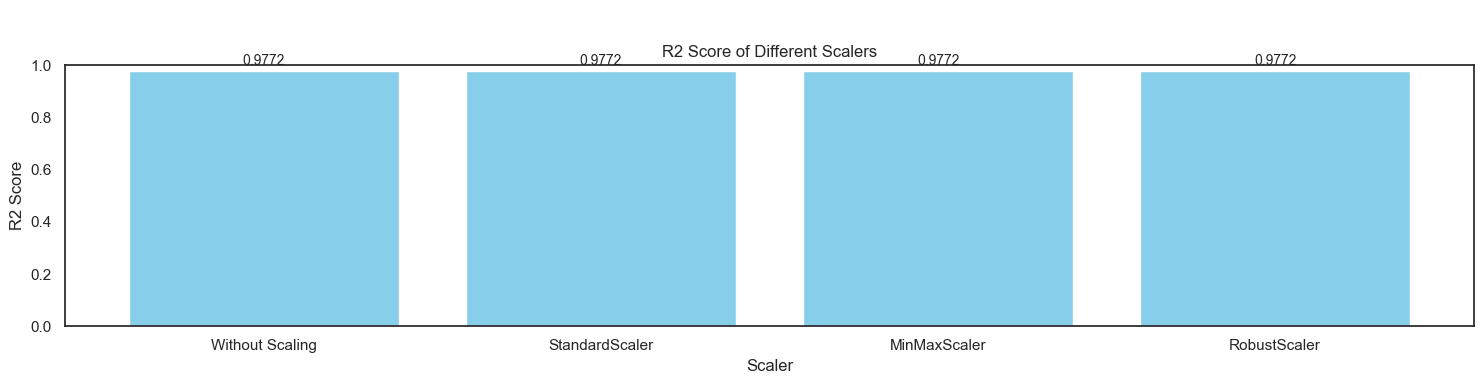

In [195]:
# Liste des scalers à utiliser
scaler_names = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']

# Récupération du nouveau dataset après l'encodage et la concaténation
data_processing = encoded_datasets['FrequencyEncoder']
new_dataset = concat_datasets(df_numeriques, data_processing)

# Initialisation du modèle de régression XGBoost
regressor_model = XGBRegressor(random_state=42)

# Appel de la fonction pour entraîner et évaluer avec mise à l'échelle
train_and_evaluate_with_scaling(new_dataset, regressor_model, scaler_names, threshold)


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">Graphiques de Variance Expliquée par l'Analyse en Composantes Principales </div> 

In [204]:
def plot_pca_explained_variance(data, numerical_columns):
    # Extract numerical features and target variable
    X_data = data[numerical_columns].copy()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_data)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Create a 2x1 grid of subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Plot the explained variance ratio in the first subplot
    ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Explained Variance Ratio")
    ax1.set_title("Explained Variance Ratio by Principal Component")

    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plot the cumulative explained variance in the second subplot
    ax2.plot(
        range(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance,
        marker="o",
    )
    ax2.set_xlabel("Number of Principal Components")
    ax2.set_ylabel("Cumulative Explained Variance")
    ax2.set_title("Cumulative Explained Variance by Principal Components")

    # Display the figure
    plt.tight_layout()
    plt.show()

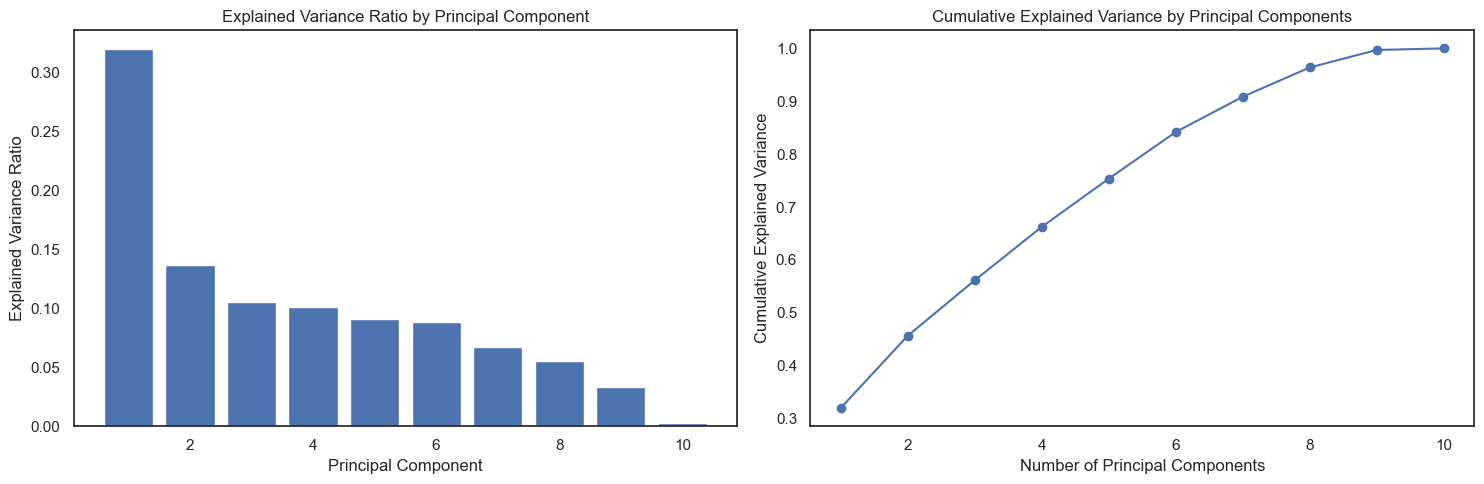

In [205]:
numerical_columns = [col for col in new_dataset.columns.tolist() if col not in ['salary_in_usd']]
plot_pca_explained_variance(new_dataset, numerical_columns)

##### Comment varie R2 score en fonction en n_components composantes principales (PCA)

In [216]:
def apply_pca(X, new_dimension=2):
    """
    Applique l'analyse en composantes principales (PCA) à un ensemble de données.

    :param X: DataFrame, l'ensemble de données
    :param new_dimension: int, la nouvelle dimension souhaitée après PCA
    :return: DataFrame, le DataFrame transformé par PCA
    """
    # Étape 1: Standardisation des données
    std = StandardScaler()
    transformed = std.fit_transform(X)

    # Étape 2: Appliquer l'analyse en composantes principales (PCA)
    pca = PCA(n_components=new_dimension)
    X_pca = pca.fit_transform(transformed)

    # Étape 3: Créer un DataFrame avec les composantes principales
    df_pca = pd.DataFrame(data=X_pca, columns=["X_%s" % x for x in range(new_dimension)])

    # Informations d'impression
    #print("Forme originale:   ", X.shape)
    #print("Forme transformée:", df_pca.shape)

    return df_pca

In [218]:
def evaluate_r2_vs_dimensions(X, y, threshold, max_new_dimension, model):
    """
    Évalue comment le score R2 varie en fonction de la dimension après PCA.

    :param X: DataFrame, les caractéristiques des données
    :param y: Series, la variable cible
    :param threshold: float, la taille de l'ensemble de test (proportion)
    :param max_new_dimension: int, la dimension maximale à explorer après PCA
    :param model: modèle de régression utilisé pour évaluer le score R2
    """
    r2_scores = []
    dimensions = list(range(1, max_new_dimension + 1, 2))

    for dim in dimensions:
        X_dim = apply_pca(X, dim)  # Utilisation de la fonction apply_pca
        #print("")
        X_train, X_test, y_train, y_test = train_test_split(X_dim, y, test_size=threshold, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)

    # Tracer le graphique des scores R2
    plt.figure(figsize=(11, 5))
    plt.plot(dimensions, r2_scores, marker='o', linestyle='-')
    plt.title('Variation du score R2 en fonction de la dimension après PCA')
    plt.xlabel('Dimension après PCA')
    plt.ylabel('Score R2')
    plt.xticks(np.arange(1, max_new_dimension + 1))
    plt.grid(True)
    # Ajouter les valeurs de x et y à chaque point
    for i, (x, y) in enumerate(zip(dimensions, r2_scores)):
        plt.text(x, y, f'({x}, {y:.2f})', ha='left', va='bottom')

    plt.show()

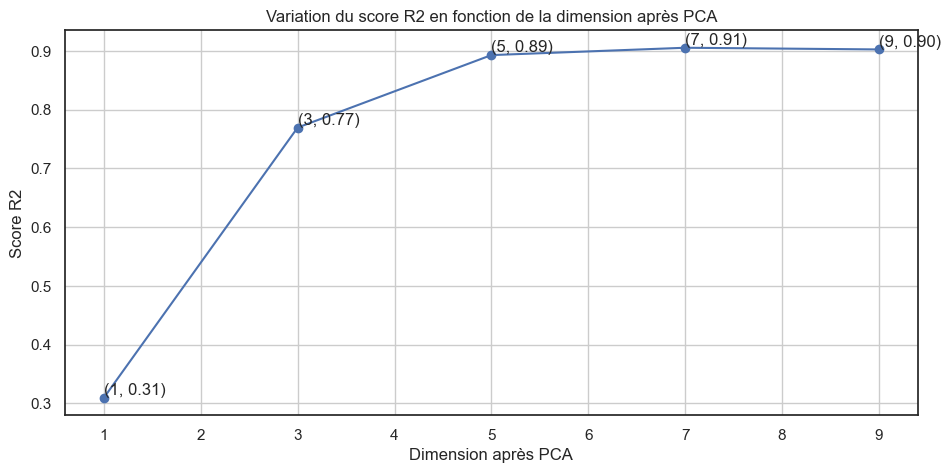

In [225]:
X, y , max_new_dimension,threshold = new_dataset[numerical_columns], data["salary_in_usd"] , 9, 0.2
# Initialisation du modèle de régression XGBoost
regressor_model = XGBRegressor(random_state=42)
evaluate_r2_vs_dimensions(X, y ,threshold,max_new_dimension, regressor_model)

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimisation des hyperparamètres pour XGBRegressor avec GridSearchCV </div> 

#### Qu'est-ce que l'Erreur Quadratique Moyenne (MSE), l'Erreur Absolue Moyenne (MAE), l'Erreur Quadratique Moyenne (RMSE) et le Coefficient de Détermination (R²) ?

#### Erreur Quadratique Moyenne (MSE) :
- L'Erreur Quadratique Moyenne est une mesure de la moyenne des carrés des écarts entre les prédictions d'un modèle et les valeurs réelles.
- Elle est souvent utilisée pour évaluer la précision d'un modèle de régression.
- Calculée en prenant la moyenne des carrés des différences entre chaque prédiction et sa valeur réelle.
- Plus sensible aux valeurs aberrantes, car elle pénalise les erreurs importantes en les élevant au carré.

#### Erreur Absolue Moyenne (MAE) :
- L'Erreur Absolue Moyenne est une mesure de la moyenne des valeurs absolues des écarts entre les prédictions d'un modèle et les valeurs réelles.
- Elle est également utilisée pour évaluer la précision d'un modèle de régression.
- Calculée en prenant la moyenne des valeurs absolues des différences entre chaque prédiction et sa valeur réelle.
- Moins sensible aux valeurs aberrantes que MSE, car elle ne pénalise pas les erreurs en les élevant au carré.

#### Erreur Quadratique Moyenne (RMSE) :
- L'Erreur Quadratique Moyenne est similaire à MSE, mais elle prend la racine carrée de la moyenne des carrés des écarts.
- Elle donne une mesure de l'écart-type des résidus (erreurs) du modèle.
- Comme MSE, elle est sensible aux valeurs aberrantes en élevant les erreurs au carré, mais la racine carrée atténue cet effet.

#### Coefficient de Détermination (R²) :
- Le Coefficient de Détermination, souvent appelé R², est une mesure de la proportion de la variance dans la variable dépendante qui est prévisible à partir des variables indépendantes.
- Il indique à quel point les prédictions d'un modèle s'ajustent aux données réelles.
- Varie de 0 à 1, où 1 indique un ajustement parfait du modèle aux données et 0 indique qu'aucun ajustement n'est réalisé.
- Plus élevé est le R², meilleure est l'adéquation du modèle aux données, bien qu'il puisse être biaisé par le nombre de variables dans le modèle.


### XGBRegressor avec GridSearchCV et MSE 

In [332]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, mean_squared_error


def optimize_xgb_regressor(X_train, y_train):
    """
    Optimise les hyperparamètres pour XGBRegressor en utilisant GridSearchCV avec KFold.

    :param X_train: DataFrame, les features d'entraînement
    :param y_train: Series, la cible d'entraînement
    :return: GridSearchCV, l'objet GridSearchCV entraîné
    """

    # Définissez les hyperparamètres que vous souhaitez optimiser
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.0001,0.01, 0.1, 0.2],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
    # Créez un objet XGBRegressor
    xgb = XGBRegressor()

    # Créer un objet KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Définir le scoring comme -MSE (Mean Squared Error)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

    # Créer un objet GridSearchCV avec KFold et scoring comme -MSE
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=1, scoring=mse_scorer)

    # Exécuter la recherche sur grille
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs paramètres
    print("Meilleurs paramètres:", grid_search.best_params_)

    # Afficher le meilleur score (MSE)
    print("Meilleur score (MSE):", -grid_search.best_score_)

    return grid_search


In [333]:
# Appeler la fonction pour optimiser XGBRegressor
grid_search = optimize_xgb_regressor(X_train, y_train)

# Maintenant, vous avez les meilleurs paramètres
# Vous pouvez entraîner un modèle avec ces paramètres
best_xgb = XGBRegressor(**grid_search.best_params_)

# Entraîner le modèle sur toutes les données d'entraînement
best_xgb.fit(X_train, y_train)

# Vous pouvez maintenant faire des prédictions sur de nouvelles données
# Par exemple, vos données de test X_test
y_pred = best_xgb.predict(X_test)

# Calculer l'erreur (par exemple, MSE) sur les prédictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error sur les données de test:", mse)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


Meilleurs paramètres: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score (MSE): 40613455.39876939
Mean Squared Error sur les données de test: 125013207.29039896


### XGBRegressor avec GridSearchCV et R2 score

In [329]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, r2_score
from xgboost import XGBRegressor

def optimize_xgb_regressor_r2(X_train, y_train):
    """
    Optimise les hyperparamètres pour XGBRegressor en utilisant GridSearchCV avec KFold.

    :param X_train: DataFrame, les features d'entraînement
    :param y_train: Series, la cible d'entraînement
    :return: GridSearchCV, l'objet GridSearchCV entraîné
    """

    # Définissez les hyperparamètres que vous souhaitez optimiser
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.0001,0.01, 0.1, 0.2],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

    # Créez un objet XGBRegressor
    xgb = XGBRegressor()

    # Créer un objet KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Définir le scoring comme R2 score
    r2_scorer = make_scorer(r2_score)

    # Créer un objet GridSearchCV avec KFold et scoring comme R2 score
    grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=kf, n_jobs=-1, verbose=1, scoring=r2_scorer)

    # Exécuter la recherche sur grille
    grid_search.fit(X_train, y_train)

    # Afficher les meilleurs paramètres
    print("Meilleurs paramètres:", grid_search.best_params_)

    # Afficher le meilleur score (R2 score)
    print("Meilleur score (R2 score):", grid_search.best_score_)

    return grid_search


In [331]:
# Appeler la fonction pour optimiser XGBRegressor avec R2 score
grid_search_r2 = optimize_xgb_regressor_r2(X_train, y_train)

# Maintenant, vous avez les meilleurs paramètres
# Vous pouvez entraîner un modèle avec ces paramètres
best_xgb_r2 = XGBRegressor(**grid_search_r2.best_params_)

# Entraîner le modèle sur toutes les données d'entraînement
best_xgb_r2.fit(X_train, y_train)

# Vous pouvez maintenant faire des prédictions sur de nouvelles données
# Par exemple, vos données de test X_test
y_pred_r2 = best_xgb_r2.predict(X_test)

# Calculer le R2 score sur les prédictions
r2 = r2_score(y_test, y_pred_r2)
print("R2 Score sur les données de test:", r2)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Meilleurs paramètres: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score (R2 score): 0.9923360149918743
R2 Score sur les données de test: 0.9758276462688444


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Modèle d'un Réseau de Neurones Artificiels (ANN) pour Prédire le Salaire en USD en Fonction des Caractéristiques </div> 

In [301]:
# Importations nécessaires
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

def create_nn_model(input_shape, l2_reg=0.0005):
    """
    Fonction pour créer un modèle de réseau de neurones pour la régression.

    Args:
    - input_shape: Tuple spécifiant la forme des données d'entrée
    - l2_reg: Paramètre pour la régularisation L2 (par défaut : 0.0005)

    Returns:
    - nn_model: Modèle de réseau de neurones
    """

    # Création d'un modèle séquentiel
    nn_model = tf.keras.Sequential(name='Salary_Prediction_Model')

    # Couche d'entrée pour spécifier la forme des données
    nn_model.add(Input(input_shape))

    # Couches cachées avec régularisation L2 pour éviter le surapprentissage
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2_reg)))
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2_reg)))
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2_reg)))
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(l2_reg)))

    # Couche de sortie avec une activation linéaire pour la régression
    nn_model.add(Dense(1, activation='linear'))
    
    return nn_model


Où Utiliser Quelle Métrique pour Déterminer les Performances d'un Modèle d'Apprentissage Automatique ?

### MAE (Erreur Absolue Moyenne) :
- Moins sensible aux valeurs aberrantes par rapport à MSE.
- Généralement utilisée lors de la mesure des performances sur des données à variables continues.
- Fournit une valeur linéaire en moyennant les différences individuelles pondérées de manière égale.
- Plus la valeur est basse, meilleures sont les performances du modèle.

### MSE (Erreur Quadratique Moyenne) :
- Couramment utilisée mais moins utile lorsqu'une seule mauvaise prédiction peut affecter considérablement les prédictions de l'ensemble du modèle (par exemple, avec des ensembles de données bruyants).
- Plus efficace lorsqu'il s'agit de jeux de données contenant des valeurs aberrantes ou inattendues (par exemple, des valeurs très élevées ou très basses).

### RMSE (Erreur Quadratique Moyenne) :
- Les erreurs sont au carré avant d'être moyennées, ce qui donne plus de poids aux erreurs importantes.
- Plus utile lorsqu'il s'agit d'erreurs importantes qui affectent considérablement les performances du modèle.
- Évite de prendre la valeur absolue de l'erreur, utile dans divers calculs mathématiques.
- Comme pour MAE et MSE, des valeurs plus basses indiquent de meilleures performances du modèle.


In [296]:
import tensorflow.keras.backend as K

def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [290]:
def compile_nn_model(input_shape,l2_reg):
    """
    Crée et compile un modèle de réseau de neurones pour un problème de régression.

    Args:
    - input_shape: Tuple spécifiant la forme des données d'entrée
    - l2_reg: Paramètre pour la régularisation L2

    Returns:
    - nn_model: Modèle de réseau de neurones compilé
    - model_checkpoint_callback: Callback pour sauvegarder les meilleurs modèles
    """

    # Création du modèle de réseau de neurones en utilisant la fonction create_nn_model
    nn_model = create_nn_model(input_shape,l2_reg)

    # Affichage d'un résumé du modèle
    nn_model.summary()

    # Définition de la planification du taux d'apprentissage
    lr_schedule = ExponentialDecay(
        initial_learning_rate=1e-3,      # Taux d'apprentissage initial
        decay_steps=10000,               # Nombre d'étapes pour réduire le taux d'apprentissage
        decay_rate=0.5,                  # Taux de réduction du taux d'apprentissage
        staircase=False                  # Si True, la mise à jour du taux est discrète, sinon continue
    )

    # Création de la fonction de perte Mean Squared Error (MSE)
    loss_function = 'mean_squared_error'

    # Configuration du callback pour sauvegarder les meilleurs modèles
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='/Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/',   # Chemin où sauvegarder les modèles
        save_weights_only=False,       # Si True, sauvegarde uniquement les poids, sinon le modèle entier
        monitor='val_loss',            # Métrique à surveiller pour la sauvegarde (val_loss pour la perte de validation)
        mode='min',                    # Mode de sauvegarde (minimiser la métrique de validation)
        save_best_only=True            # Ne sauvegarde que le meilleur modèle selon la métrique de validation
    )

    # Compilation du modèle avec l'optimiseur Adam, la fonction de perte MSE et les métriques MAE et RMSE
    nn_model.compile(
        optimizer=Adam(lr_schedule),    # Optimiseur Adam avec la planification du taux d'apprentissage
        loss=loss_function,             # Fonction de perte Mean Squared Error (MSE)
        metrics=['mean_absolute_error', 'mean_squared_error',r_squared]  # Métriques à utiliser
    )

    return nn_model, model_checkpoint_callback


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split dataset in train et test set </div> 

In [227]:
X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=0.20, random_state=200)
print_dataset_info(X_train, X_test, y_train, y_test)


Dimensions de X_train : (5279, 10)
Dimensions de X_test  : (1320, 10)
Dimensions de y_train : (5279,)
Dimensions de y_test  : (1320,)



In [322]:
# Spécifier la forme des données d'entrée et le nombre de classes
input_shape = (X_train.shape[1],)  # Taille de chaque image dans X_train

# Afficher les informations sur les données
print(f"Forme des données d'entrée (input_shape) : {input_shape}")

l2_reg=0.0000005

# Utilisation de la fonction pour créer le modèle
nn_model,model_checkpoint_callback = compile_nn_model(input_shape,l2_reg)

# Déterminer les dimensions de votre jeu de données
batch_size = 100  # Peut ajuster en fonction de la mémoire disponible
num_epochs = 150  # Peut ajuster en fonction de la convergence

# Entraînement du modèle de réseau de neurones
# X_train : données d'entraînement
# y_train : étiquettes de classe correspondantes pour les données d'entraînement
# X_test : données de validation
# y_train : étiquettes de classe correspondantes pour les données de validation
# batch_size : nombre de données d'entraînement utilisées à chaque étape de l'entraînement
# epochs : nombre d'itérations sur l'ensemble des données d'entraînement
# verbose : affiche des informations pendant l'entraînement (0 : silencieux, 1 : barre de progression, 2 : une ligne par époque)

results = nn_model.fit(X_train,y_train,                  # Données d'entraînement
                       validation_data=(X_test,y_test),  # Données de validation
                       batch_size=batch_size,            # Nombre d'échantillons à traiter à chaque étape de l'entraînement
                       epochs=num_epochs,                # Nombre d'itérations sur l'ensemble des données
                       verbose=2,                        # Affichage détaillé des informations pendant l'entraînement
                       callbacks=[model_checkpoint_callback])    # Liste des callbacks, incluant ModelCheckpoint


Forme des données d'entrée (input_shape) : (10,)
Model: "Salary_Prediction_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 256)               2816      
                                                                 
 dense_93 (Dense)            (None, 256)               65792     
                                                                 
 dense_94 (Dense)            (None, 256)               65792     
                                                                 
 dense_95 (Dense)            (None, 256)               65792     
                                                                 
 dense_96 (Dense)            (None, 1)                 257       
                                                                 
Total params: 200449 (783.00 KB)
Trainable params: 200449 (783.00 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 2s - loss: 34262122496.0000 - mean_absolute_error: 135367.8750 - mean_squared_error: 34262122496.0000 - r_squared: -6.2315e+00 - val_loss: 21368281088.0000 - val_mean_absolute_error: 128793.2266 - val_mean_squared_error: 21368281088.0000 - val_r_squared: -3.6010e+00 - 2s/epoch - 33ms/step
Epoch 2/150
53/53 - 0s - loss: 25351972864.0000 - mean_absolute_error: 133531.8125 - mean_squared_error: 25351972864.0000 - r_squared: -4.5000e+00 - val_loss: 23110305792.0000 - val_mean_absolute_error: 136277.9688 - val_mean_squared_error: 23110305792.0000 - val_r_squared: -3.9953e+00 - 227ms/epoch - 4ms/step
Epoch 3/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 28509638656.0000 - mean_absolute_error: 128535.2734 - mean_squared_error: 28509638656.0000 - r_squared: -5.4859e+00 - val_loss: 20629192704.0000 - val_mean_absolute_error: 122232.7266 - val_mean_squared_error: 20629190656.0000 - val_r_squared: -3.4168e+00 - 886ms/epoch - 17ms/step
Epoch 4/150
53/53 - 0s - loss: 29019142144.0000 - mean_absolute_error: 135103.1406 - mean_squared_error: 29019142144.0000 - r_squared: -5.1536e+00 - val_loss: 22411520000.0000 - val_mean_absolute_error: 133757.3438 - val_mean_squared_error: 22411520000.0000 - val_r_squared: -3.8397e+00 - 197ms/epoch - 4ms/step
Epoch 5/150
53/53 - 0s - loss: 28377419776.0000 - mean_absolute_error: 130787.9922 - mean_squared_error: 28377419776.0000 - r_squared: -5.0419e+00 - val_loss: 20657963008.0000 - val_mean_absolute_error: 124445.4766 - val_mean_squared_error: 20657963008.0000 - val_r_squared: -3.4343e+00 - 182ms/epoch - 3ms/step
Epoch 6/150
53/53 - 0s - loss: 26539098112.0000 - mean_absolute_error: 1306

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 25577299968.0000 - mean_absolute_error: 143811.4375 - mean_squared_error: 25577299968.0000 - r_squared: -4.4321e+00 - val_loss: 20540846080.0000 - val_mean_absolute_error: 122337.1875 - val_mean_squared_error: 20540846080.0000 - val_r_squared: -3.4000e+00 - 632ms/epoch - 12ms/step
Epoch 13/150
53/53 - 0s - loss: 26587334656.0000 - mean_absolute_error: 131313.7969 - mean_squared_error: 26587334656.0000 - r_squared: -4.9083e+00 - val_loss: 21324652544.0000 - val_mean_absolute_error: 128870.0938 - val_mean_squared_error: 21324652544.0000 - val_r_squared: -3.5931e+00 - 180ms/epoch - 3ms/step
Epoch 14/150
53/53 - 0s - loss: 25353873408.0000 - mean_absolute_error: 137081.6406 - mean_squared_error: 25353871360.0000 - r_squared: -4.4301e+00 - val_loss: 20707823616.0000 - val_mean_absolute_error: 124800.0000 - val_mean_squared_error: 20707823616.0000 - val_r_squared: -3.4482e+00 - 176ms/epoch - 3ms/step
Epoch 15/150
53/53 - 0s - loss: 27433127936.0000 - mean_absolute_error: 1

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 19487238144.0000 - mean_absolute_error: 114065.2656 - mean_squared_error: 19487238144.0000 - r_squared: -3.0456e+00 - val_loss: 17699571712.0000 - val_mean_absolute_error: 69648.4766 - val_mean_squared_error: 17699571712.0000 - val_r_squared: -2.6226e+00 - 626ms/epoch - 12ms/step
Epoch 18/150
53/53 - 0s - loss: 29736323072.0000 - mean_absolute_error: 123836.4453 - mean_squared_error: 29736323072.0000 - r_squared: -5.4470e+00 - val_loss: 20558581760.0000 - val_mean_absolute_error: 121242.2578 - val_mean_squared_error: 20558581760.0000 - val_r_squared: -3.3989e+00 - 184ms/epoch - 3ms/step
Epoch 19/150
53/53 - 0s - loss: 27280656384.0000 - mean_absolute_error: 126025.7812 - mean_squared_error: 27280656384.0000 - r_squared: -4.7362e+00 - val_loss: 23943716864.0000 - val_mean_absolute_error: 138253.5938 - val_mean_squared_error: 23943716864.0000 - val_r_squared: -4.1776e+00 - 175ms/epoch - 3ms/step
Epoch 20/150
53/53 - 0s - loss: 24360493056.0000 - mean_absolute_error: 13

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 20666935296.0000 - mean_absolute_error: 104356.3359 - mean_squared_error: 20666935296.0000 - r_squared: -2.9871e+00 - val_loss: 11882142720.0000 - val_mean_absolute_error: 82590.0000 - val_mean_squared_error: 11882142720.0000 - val_r_squared: -1.4781e+00 - 626ms/epoch - 12ms/step
Epoch 25/150
53/53 - 0s - loss: 16955073536.0000 - mean_absolute_error: 85512.2734 - mean_squared_error: 16955073536.0000 - r_squared: -2.4368e+00 - val_loss: 24603475968.0000 - val_mean_absolute_error: 133538.7344 - val_mean_squared_error: 24603473920.0000 - val_r_squared: -4.3127e+00 - 180ms/epoch - 3ms/step
Epoch 26/150
53/53 - 0s - loss: 21785292800.0000 - mean_absolute_error: 122443.4844 - mean_squared_error: 21785292800.0000 - r_squared: -3.5373e+00 - val_loss: 18130841600.0000 - val_mean_absolute_error: 103637.5625 - val_mean_squared_error: 18130841600.0000 - val_r_squared: -2.8495e+00 - 173ms/epoch - 3ms/step
Epoch 27/150
53/53 - 0s - loss: 24494309376.0000 - mean_absolute_error: 101

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 13477645312.0000 - mean_absolute_error: 71356.2188 - mean_squared_error: 13477645312.0000 - r_squared: -1.8243e+00 - val_loss: 2694682880.0000 - val_mean_absolute_error: 23819.3359 - val_mean_squared_error: 2694682880.0000 - val_r_squared: 0.5163 - 632ms/epoch - 12ms/step
Epoch 29/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 4014020096.0000 - mean_absolute_error: 25835.0957 - mean_squared_error: 4014020096.0000 - r_squared: 0.2244 - val_loss: 1296424576.0000 - val_mean_absolute_error: 12222.2969 - val_mean_squared_error: 1296424576.0000 - val_r_squared: 0.7875 - 640ms/epoch - 12ms/step
Epoch 30/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 1073167360.0000 - mean_absolute_error: 10531.6826 - mean_squared_error: 1073167488.0000 - r_squared: 0.8097 - val_loss: 1236025600.0000 - val_mean_absolute_error: 8687.4717 - val_mean_squared_error: 1236025600.0000 - val_r_squared: 0.7791 - 806ms/epoch - 15ms/step
Epoch 31/150
53/53 - 0s - loss: 6789888512.0000 - mean_absolute_error: 36633.2422 - mean_squared_error: 6789888512.0000 - r_squared: -3.3342e-01 - val_loss: 1321751296.0000 - val_mean_absolute_error: 11062.7441 - val_mean_squared_error: 1321751168.0000 - val_r_squared: 0.8065 - 180ms/epoch - 3ms/step
Epoch 32/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 863919680.0000 - mean_absolute_error: 8103.8672 - mean_squared_error: 863919680.0000 - r_squared: 0.8439 - val_loss: 1055314560.0000 - val_mean_absolute_error: 10554.8984 - val_mean_squared_error: 1055314496.0000 - val_r_squared: 0.8373 - 664ms/epoch - 13ms/step
Epoch 33/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 698807744.0000 - mean_absolute_error: 7589.3921 - mean_squared_error: 698807744.0000 - r_squared: 0.8832 - val_loss: 733634560.0000 - val_mean_absolute_error: 5604.1553 - val_mean_squared_error: 733634560.0000 - val_r_squared: 0.8918 - 632ms/epoch - 12ms/step
Epoch 34/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 849926144.0000 - mean_absolute_error: 6088.8867 - mean_squared_error: 849926144.0000 - r_squared: 0.8663 - val_loss: 668201600.0000 - val_mean_absolute_error: 5108.6733 - val_mean_squared_error: 668201600.0000 - val_r_squared: 0.8814 - 640ms/epoch - 12ms/step
Epoch 35/150
53/53 - 0s - loss: 899630144.0000 - mean_absolute_error: 6913.8633 - mean_squared_error: 899630144.0000 - r_squared: 0.8319 - val_loss: 851852928.0000 - val_mean_absolute_error: 5167.2773 - val_mean_squared_error: 851852928.0000 - val_r_squared: 0.8788 - 180ms/epoch - 3ms/step
Epoch 36/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 574075904.0000 - mean_absolute_error: 5294.9595 - mean_squared_error: 574075904.0000 - r_squared: 0.9106 - val_loss: 579340672.0000 - val_mean_absolute_error: 4258.0234 - val_mean_squared_error: 579340672.0000 - val_r_squared: 0.9066 - 626ms/epoch - 12ms/step
Epoch 37/150
53/53 - 0s - loss: 578152704.0000 - mean_absolute_error: 5919.2217 - mean_squared_error: 578152640.0000 - r_squared: 0.9015 - val_loss: 609872000.0000 - val_mean_absolute_error: 7116.7930 - val_mean_squared_error: 609872000.0000 - val_r_squared: 0.8989 - 181ms/epoch - 3ms/step
Epoch 38/150
53/53 - 0s - loss: 527431840.0000 - mean_absolute_error: 5525.0796 - mean_squared_error: 527431840.0000 - r_squared: 0.9179 - val_loss: 735548352.0000 - val_mean_absolute_error: 5342.7188 - val_mean_squared_error: 735548416.0000 - val_r_squared: 0.8932 - 176ms/epoch - 3ms/step
Epoch 39/150
53/53 - 0s - loss: 533641056.0000 - mean_absolute_error: 5698.4688 - mean_squared_error: 533641056.0000 - r_squared: 0.9211 - 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 493047968.0000 - mean_absolute_error: 5307.4233 - mean_squared_error: 493048032.0000 - r_squared: 0.9201 - val_loss: 545200896.0000 - val_mean_absolute_error: 5225.2700 - val_mean_squared_error: 545200896.0000 - val_r_squared: 0.9095 - 632ms/epoch - 12ms/step
Epoch 44/150
53/53 - 0s - loss: 490731840.0000 - mean_absolute_error: 5374.0210 - mean_squared_error: 490731840.0000 - r_squared: 0.9189 - val_loss: 612339712.0000 - val_mean_absolute_error: 7243.9741 - val_mean_squared_error: 612339648.0000 - val_r_squared: 0.9036 - 220ms/epoch - 4ms/step
Epoch 45/150
53/53 - 0s - loss: 503625248.0000 - mean_absolute_error: 5214.6968 - mean_squared_error: 503625248.0000 - r_squared: 0.9260 - val_loss: 558056896.0000 - val_mean_absolute_error: 5471.2539 - val_mean_squared_error: 558056896.0000 - val_r_squared: 0.9088 - 173ms/epoch - 3ms/step
Epoch 46/150
53/53 - 0s - loss: 483936096.0000 - mean_absolute_error: 5305.7554 - mean_squared_error: 483936096.0000 - r_squared: 0.9191 - 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 479804576.0000 - mean_absolute_error: 5884.2222 - mean_squared_error: 479804576.0000 - r_squared: 0.9234 - val_loss: 534474528.0000 - val_mean_absolute_error: 6748.3423 - val_mean_squared_error: 534474528.0000 - val_r_squared: 0.9042 - 691ms/epoch - 13ms/step
Epoch 56/150
53/53 - 0s - loss: 586900992.0000 - mean_absolute_error: 7163.9941 - mean_squared_error: 586900992.0000 - r_squared: 0.9104 - val_loss: 589043200.0000 - val_mean_absolute_error: 9814.0352 - val_mean_squared_error: 589043200.0000 - val_r_squared: 0.8866 - 180ms/epoch - 3ms/step
Epoch 57/150
53/53 - 0s - loss: 505663072.0000 - mean_absolute_error: 5638.3237 - mean_squared_error: 505663072.0000 - r_squared: 0.9150 - val_loss: 734854848.0000 - val_mean_absolute_error: 7625.2622 - val_mean_squared_error: 734854848.0000 - val_r_squared: 0.8882 - 172ms/epoch - 3ms/step
Epoch 58/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 482967040.0000 - mean_absolute_error: 5294.4692 - mean_squared_error: 482966976.0000 - r_squared: 0.9183 - val_loss: 524737920.0000 - val_mean_absolute_error: 5823.4976 - val_mean_squared_error: 524737920.0000 - val_r_squared: 0.9047 - 995ms/epoch - 19ms/step
Epoch 59/150
INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 522476224.0000 - mean_absolute_error: 6135.8789 - mean_squared_error: 522476224.0000 - r_squared: 0.9173 - val_loss: 513471840.0000 - val_mean_absolute_error: 4321.3892 - val_mean_squared_error: 513471840.0000 - val_r_squared: 0.9065 - 630ms/epoch - 12ms/step
Epoch 60/150
53/53 - 0s - loss: 523862272.0000 - mean_absolute_error: 5602.7847 - mean_squared_error: 523862272.0000 - r_squared: 0.9109 - val_loss: 580325568.0000 - val_mean_absolute_error: 6819.7954 - val_mean_squared_error: 580325568.0000 - val_r_squared: 0.9032 - 179ms/epoch - 3ms/step
Epoch 61/150
53/53 - 0s - loss: 487115552.0000 - mean_absolute_error: 4688.0840 - mean_squared_error: 487115552.0000 - r_squared: 0.9180 - val_loss: 606468032.0000 - val_mean_absolute_error: 5820.1050 - val_mean_squared_error: 606468160.0000 - val_r_squared: 0.9019 - 170ms/epoch - 3ms/step
Epoch 62/150
53/53 - 0s - loss: 504112704.0000 - mean_absolute_error: 5987.9600 - mean_squared_error: 504112640.0000 - r_squared: 0.9125 - 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 467735296.0000 - mean_absolute_error: 4736.5063 - mean_squared_error: 467735296.0000 - r_squared: 0.9316 - val_loss: 513450176.0000 - val_mean_absolute_error: 4810.3369 - val_mean_squared_error: 513450176.0000 - val_r_squared: 0.9056 - 627ms/epoch - 12ms/step
Epoch 66/150
53/53 - 0s - loss: 490690208.0000 - mean_absolute_error: 7140.1235 - mean_squared_error: 490690208.0000 - r_squared: 0.9145 - val_loss: 597871936.0000 - val_mean_absolute_error: 5265.6875 - val_mean_squared_error: 597871936.0000 - val_r_squared: 0.9033 - 178ms/epoch - 3ms/step
Epoch 67/150
53/53 - 0s - loss: 439537440.0000 - mean_absolute_error: 4676.4487 - mean_squared_error: 439537440.0000 - r_squared: 0.9246 - val_loss: 571866368.0000 - val_mean_absolute_error: 4977.2744 - val_mean_squared_error: 571866368.0000 - val_r_squared: 0.9002 - 171ms/epoch - 3ms/step
Epoch 68/150
53/53 - 0s - loss: 436720032.0000 - mean_absolute_error: 5717.5078 - mean_squared_error: 436720032.0000 - r_squared: 0.9262 - 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Salary_Analysis_Data_Scientists/best_model/assets


53/53 - 1s - loss: 478831872.0000 - mean_absolute_error: 6294.4194 - mean_squared_error: 478831872.0000 - r_squared: 0.9257 - val_loss: 512924416.0000 - val_mean_absolute_error: 4104.7544 - val_mean_squared_error: 512924416.0000 - val_r_squared: 0.9038 - 628ms/epoch - 12ms/step
Epoch 71/150
53/53 - 0s - loss: 536577024.0000 - mean_absolute_error: 6622.3999 - mean_squared_error: 536577024.0000 - r_squared: 0.9139 - val_loss: 626611776.0000 - val_mean_absolute_error: 7585.8765 - val_mean_squared_error: 626611776.0000 - val_r_squared: 0.9003 - 178ms/epoch - 3ms/step
Epoch 72/150
53/53 - 0s - loss: 478868224.0000 - mean_absolute_error: 6184.1284 - mean_squared_error: 478868224.0000 - r_squared: 0.9202 - val_loss: 654061888.0000 - val_mean_absolute_error: 4971.3345 - val_mean_squared_error: 654061888.0000 - val_r_squared: 0.8962 - 176ms/epoch - 3ms/step
Epoch 73/150
53/53 - 0s - loss: 449833184.0000 - mean_absolute_error: 5452.4463 - mean_squared_error: 449833184.0000 - r_squared: 0.9261 - 

In [241]:
def plot_metrics(results, metric_names):
    """
    Fonction pour tracer les courbes d'apprentissage pour différentes métriques.

    Args:
    - results: Historique des métriques pendant l'entraînement du modèle
    - metric_names: Liste des noms des métriques à tracer

    Returns:
    - None
    """
    num_metrics = len(metric_names)
    fig, axes = plt.subplots(1, num_metrics, figsize=(5 * num_metrics, 5))

    for i, metric_name in enumerate(metric_names):
        # Plotting Metric
        axes[i].plot(results.history[metric_name], color='teal', label=f'Training {metric_name}')
        val_metric_name = f'val_{metric_name}'
        axes[i].plot(results.history[val_metric_name], color='orange', label=f'Validation {metric_name}')
        axes[i].set_title(metric_name, fontsize=20)
        axes[i].set_xlabel('Epochs')
        axes[i].set_ylabel(metric_name)
        axes[i].legend()

    # Ajustement automatique de la disposition des sous-graphiques pour un affichage propre
    plt.tight_layout()

    # Affichage du graphique
    plt.show()


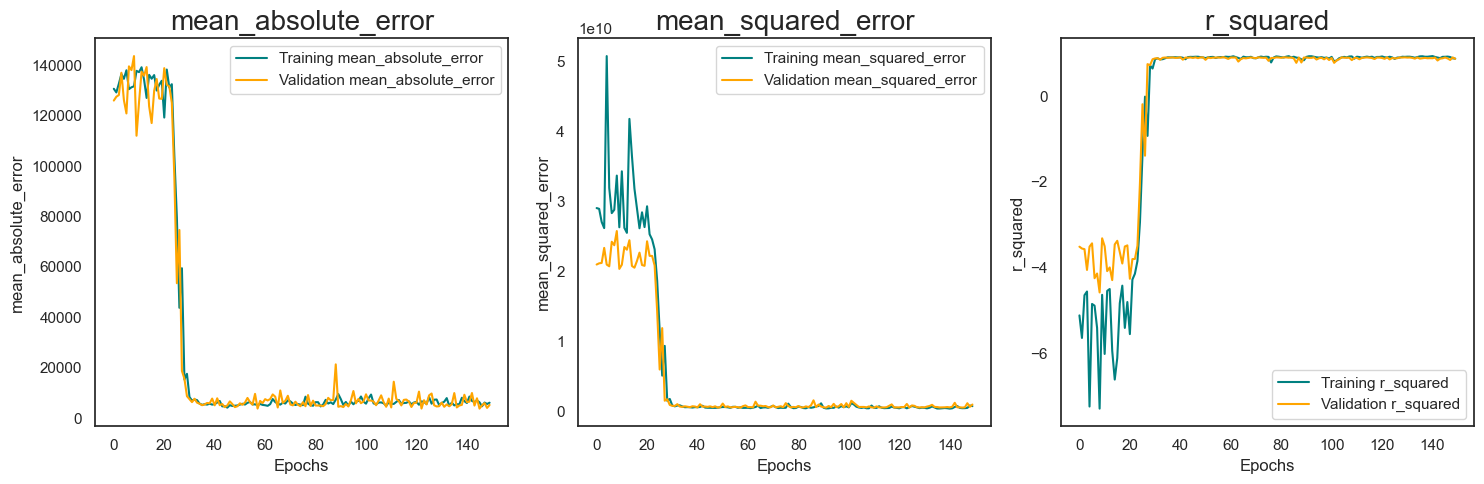

In [317]:
# Liste des noms de métriques à tracer
metric_names = ['mean_absolute_error', 'mean_squared_error', 'r_squared']

# Utilisation de la fonction pour tracer les courbes d'apprentissage
plot_metrics(results, metric_names)


In [276]:
def plot_loss_mean_squared_error(results):
    # Création de la figure avec 1 ligne et 2 colonnes pour les sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting Loss
    axes[0].plot(results.history['loss'], color='teal', label='Training Loss')
    axes[0].plot(results.history['val_loss'], color='orange', label='Validation Loss')
    axes[0].set_title('Loss', fontsize=20)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plotting Mean Squared Error
    axes[1].plot(results.history['mean_squared_error'], color='teal', label='Training Mean Squared Error')
    axes[1].plot(results.history['val_mean_squared_error'], color='orange', label='Validation Mean Squared Error')
    axes[1].set_title('Mean Squared Error', fontsize=20)
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Mean Squared Error')
    axes[1].legend()

    # Ajustement automatique de la disposition des sous-graphiques pour un affichage propre
    plt.tight_layout()

    # Affichage du graphique
    plt.show()

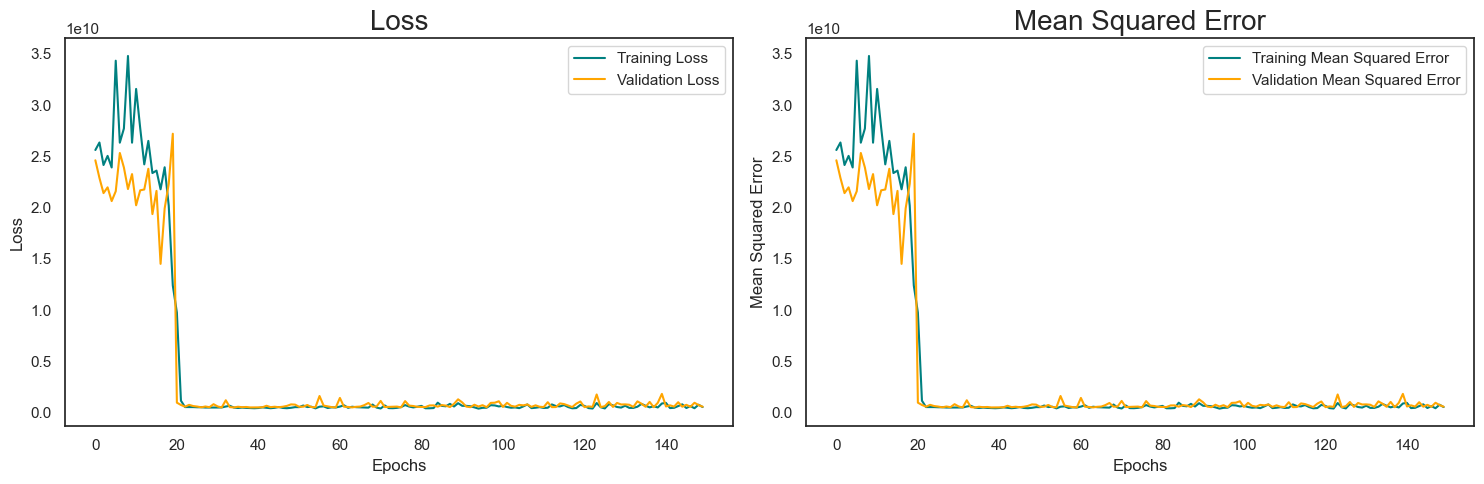

In [312]:
# Utilisation de la fonction pour afficher les graphiques
plot_loss_mean_squared_error(results)

In [319]:
def plot_loss_r_squared(results):
    # Création de la figure avec 1 ligne et 2 colonnes pour les sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting Loss
    axes[0].plot(results.history['loss'], color='teal', label='Training Loss')
    axes[0].plot(results.history['val_loss'], color='orange', label='Validation Loss')
    axes[0].set_title('Loss', fontsize=20)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plotting R2 Score
    axes[1].plot(results.history['r_squared'], color='teal', label='Training R2 Score')
    axes[1].plot(results.history['val_r_squared'], color='orange', label='Validation R2 Score')
    axes[1].set_title('R2 Score', fontsize=20)
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('R2 Score')
    axes[1].legend()

    # Ajustement automatique de la disposition des sous-graphiques pour un affichage propre
    plt.tight_layout()

    # Affichage du graphique
    plt.show()


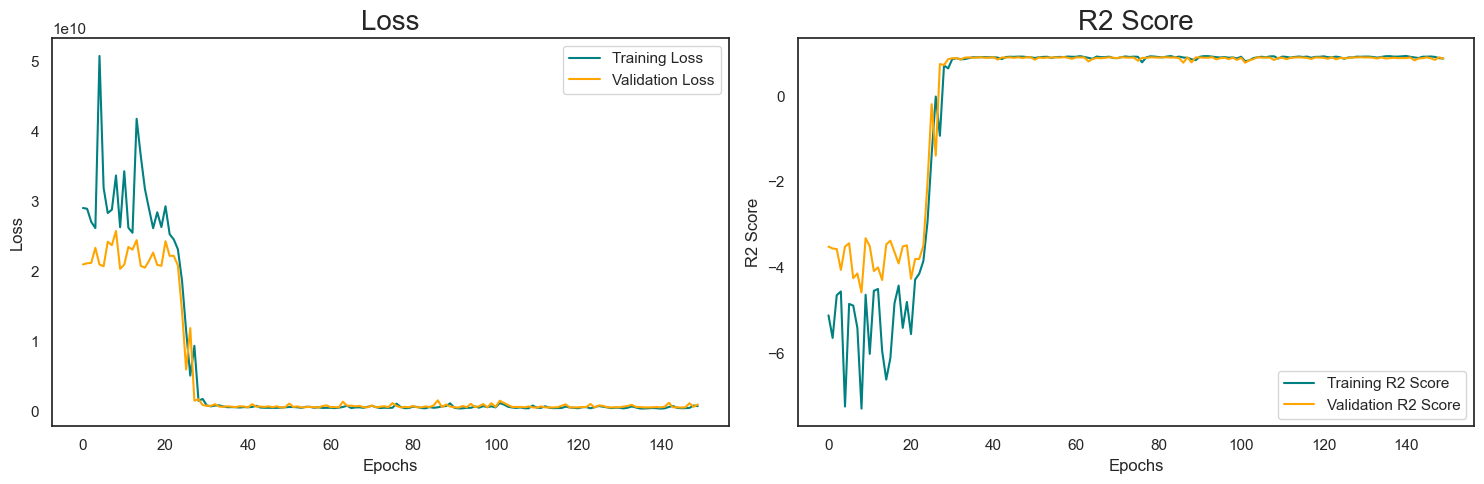

In [320]:
# Utilisation de la fonction pour tracer la courbe de la métrique par rapport aux epochs
plot_loss_r_squared(results)

In [323]:
# Affiche la valeur minimale de la perte (loss) sur les données de validation
print("Minimum de la perte (loss) sur les données de validation : ", min(results.history['val_loss']))

# Affiche la valeur maximale de l'exactitude (mean_absolute_error) sur les données de validation
print("Minimum de l'exactitude (mean_absolute_error) sur les données de validation : ", min(results.history['mean_absolute_error']))

# Évalue le modèle de réseau de neurones sur les données de test et affiche la perte et l'exactitude
nn_model.evaluate(X_test, y_test)

Minimum de la perte (loss) sur les données de validation :  512924416.0
Minimum de l'exactitude (mean_absolute_error) sur les données de validation :  4658.16650390625
42/42 [==============================] - 0s 951us/step - loss: 714678656.0000 - mean_absolute_error: 6942.5166 - mean_squared_error: 714678656.0000 - r_squared: 0.9170


[714678656.0, 6942.5166015625, 714678656.0, 0.9169658422470093]